# Lab 11 -- Wavelets

In [1]:
#Import Necessary Libraries
import numpy as np
from scipy.signal import fftconvolve
from matplotlib import pyplot as plt
import pywt

%matplotlib inline

## Problem 1
Write a function that calculates the discrete wavelet transform. The output should be a list of one-dimensional NumPy arrays in the following form: [An, Dn,...,D1]. The main body of your function should be a loop in which you calculate two arrays: the i-th approximation and detail coefficients. Append the detail coefficients array to your list, and feed the approximation array back into the loop. When the loop is finished, append the approximation array. Finally, reverse the order of your list to adhere to the required return format.

In [2]:
def dwt(X, L, H, n):
    """
    Calculates the Discrete Wavelet Transform
    
    Inputs:
        X -- The signal we want to transform.  1d array.
        L -- The low-pass filter. 1d array.
        H -- The high-pass filter. 1d array.
        n -- The degreee to which we wish to transform the signal
    
    Returns:
        LIST of one-dimensional Numpy arrays [An, Dn, ... , D2, D1]
            A -- The approximation
            Di -- ith detail array
    """
    #Initialize a list to store all the detail arrays
    D_list = list()
    
    #Initialize A
    A = X
    
    #loop through the calculation of the ith approximation and detail coefficients
    for i in range(n):
        #Append the detail coefficients array to the list
        #high pass filtering: fftconvolve does the convolution [1::2] does the down sampling
        D_list.append( fftconvolve(A, H)[1::2])
        #low pass filtering
        A = fftconvolve(A, L)[1::2]
    
    #When the loop is finished, append the approximation array
    D_list.append(A)
    
    #finally reverse the order of the list to adhere to the required return format
    return D_list[::-1]

### Problem 1 Testing
Test your function by calculating the Haar wavelet coefficients of a noisy sine signal for n = 4. Plot your results

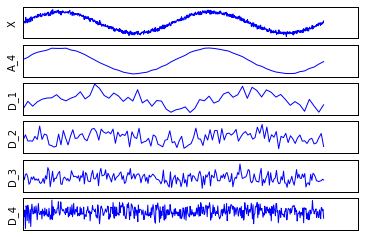

In [3]:
#     make the noise
noise = np.random.randn(1024)*.1

domain = np.linspace(0, 4*np.pi, 1024)

#make the pure sine signal
pure = np.sin(domain)

#Make the noisy signal
noisy_sine = pure + noise

#     Define the low and high filter for the Haar wavelet function

#L = [1/sqrt(2)  1/sqrt(2)]
L = np.ones(2)/ np.sqrt(2.)

#H = [-1/sqrt(2) 1/sqrt(2)]
H = np.array([-1., 1.])/ np.sqrt(2.)

#Calculate the Haar waveley coefficients for n = 4
A_4, D_1, D_2, D_3, D_4 = dwt(noisy_sine, L, H, 4)

#     Plot the results

#Original Signal
plt.subplot(6,1,1) #6 rows, 1 column, 1st plot (top)
plt.plot(domain, noisy_sine)
plt.ylabel("X")
#Get rid of tickmarks
plt.xticks([])
plt.yticks([])

#Do the same thing through the other ones
coefficients = [A_4, D_1, D_2, D_3, D_4]

names = ["A_4", "D_1", "D_2", "D_3", "D_4"]
for i in range(5):
    plt.subplot(6,1,i+2)
    
    #dwt does not return something that is the same size
    domain = np.linspace(0, 4*np.pi, coefficients[i].size)
    
    plt.plot(domain, coefficients[i])
    plt.ylabel(names[i])
    plt.xticks([])
    plt.yticks([])

#plot it
plt.show()

## Problem 2
Write a function that calculates the inverse wavelet transform.

The inputs should be a list of arrays (of the same form as the output of your discrete wavelet transform function), the low-pass filter, and the high-pass filter. The output should be a single array, the recovered
signal.

Note that the input list of arrays has length n + 1 (consisting of An together with Dn, Dn"1,...,D1), so your code should perform the process n times.

In [4]:
def dwt_inv(Lst, L, H):
    """
    Undoes the 
    
    Inputs:
        Lst -- a list of the same form as the output of dwt
        L -- the reverse low-pass filter
        H -- the reverse high-pass filter
        
    Output:
        X -- the recovered signal
    """
    #Recover what n was
    n = len(Lst) - 1
    
    #Get A_n
    A = Lst[0]
    
    #Start with D_n at the start of the list and work to D_1 at the end
    for D in Lst[1:]:
        #up sample A and D
        up_A = np.zeros(2*A.size)
        up_A[::2] = A
        up_D = np.zeros(2*D.size)
        up_D[::2] = D
        #convolve and add, but discard the last entry
        A = fftconvolve(up_A, L)[:-1] + fftconvolve(up_D, H)[:-1]
        
    #return what X would be (A_1)
    return A

### Problem 2 Testing

In order to check your work, compute the discrete wavelet transform of a random array for different values of n, then compute the inverse transform. Compare the original signal with the recovered signal using np.allclose.

In [5]:
#Go through several different values of n
for n in range(2,7):
    #display which n we are using
    print "\t n=%d"%n
    
    #make a random array
    random_array = np.random.random(1024)
    print "This is the random array:"
    print random_array
    
    #get the the dwt
    Lst = dwt(random_array, L, H, n)
    
    #H is reversed for dwt_inv
    H_inv = H[::-1]
    
    #L remains the same
    
    #recover the original with dwt_inv
    recovered = dwt_inv(Lst, L, H_inv)
    print "This is the recovered array:"
    print recovered
    
    #compare to the original signal with np.allclose()
    if np.allclose(random_array, recovered):
        print "Works for n = %d"%n
    else:
        print "Didn't work in this case.  Again, here are the arrays:"
        print random_array
        print recovered
        
    print #final print line to separate results

	 n=2
This is the random array:
[ 0.40728559  0.47644479  0.25881161 ...,  0.36889546  0.34998513
  0.03976073]
This is the recovered array:
[ 0.40728559  0.47644479  0.25881161 ...,  0.36889546  0.34998513
  0.03976073]
Works for n = 2

	 n=3
This is the random array:
[ 0.51726079  0.00839006  0.56860514 ...,  0.37742806  0.3661747
  0.85548595]
This is the recovered array:
[ 0.51726079  0.00839006  0.56860514 ...,  0.37742806  0.3661747
  0.85548595]
Works for n = 3

	 n=4
This is the random array:
[ 0.81482103  0.18365846  0.76221623 ...,  0.19412432  0.66340285
  0.94900655]
This is the recovered array:
[ 0.81482103  0.18365846  0.76221623 ...,  0.19412432  0.66340285
  0.94900655]
Works for n = 4

	 n=5
This is the random array:
[ 0.87340525  0.40133559  0.19385224 ...,  0.21812664  0.68738666
  0.18902874]
This is the recovered array:
[ 0.87340525  0.40133559  0.19385224 ...,  0.21812664  0.68738666
  0.18902874]
Works for n = 5

	 n=6
This is the random array:
[ 0.0456104   0.93

## Problem 3
Plot the subbands of the file swanlake_polluted.png, using the pywt library.

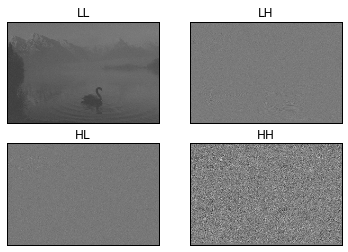

In [6]:
#Load in the swanlake_polluted.png image using scipy.misc.imread
from scipy.misc import imread

#The WaveletImages folder should be in the directory that this is executed from
swanlake_polluted = imread("./WaveletImages/swanlake_polluted.jpg", True) #flag True creates grayscale

#use the db4 wavelet with periodic extension
lw = pywt.dwt2(swanlake_polluted, 'db4', mode='per')

#Plot the 4 images
titles = ["LL", "LH", "HL", "HH"]
for i in range(4):
    #set sublot
    plt.subplot(221+i) #221, 222, 223, 224
    
    #plot it
    if i == 0:
        plt.imshow(lw[i], cmap = 'gray')
    else:
        plt.imshow(lw[1][i-1], cmap = 'gray')
    
    #get rid of tick marks
    plt.xticks([])
    plt.yticks([])
    
    #give title
    plt.title(titles[i])

plt.show()

Compare this with the subbands of the mandrill image.

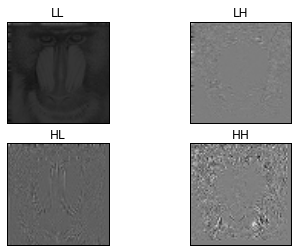

In [7]:
#Load the mandrill image
mandrill = imread("./WaveletImages/mandrill.png", True)

#use the db4 wavelet with periodic extenstion
lw_m = pywt.dwt2(mandrill, 'db4', mode='per')

#plot the 4 images
titles = ["LL", "LH", "HL", "HH"]
for i in range(4):
    #set sublot
    plt.subplot(221+i) #221, 222, 223, 224
    
    #plot it
    if i == 0:
        plt.imshow(lw_m[i], cmap = 'gray')
    else:
        plt.imshow(lw_m[1][i-1], cmap = 'gray')
    
    #get rid of tick marks
    plt.xticks([])
    plt.yticks([])
    
    #give title
    plt.title(titles[i])

plt.show()

## Problem 4
Write a function called clean_image() which accepts the name of a grayscale image file and cleans high-frequency noise out of the image. Load the image as an ndarray, and perform a wavelet decomposition using PyWavelets. Reconstruct the image using all subbands except the last set of detail coefficients, and return this cleaned image as an ndarray.

In [8]:
def clean_image(image_filename):
    """
    Inputs:
        image_filename -- the directory path of the image as a string.  Note: the image should be grayscale
        
    Output:
        an ndarray of the cleaned up image
    """
    #load the image as an nd array
    image = imread(image_filename, True)
    
    #perform a wavelet decompotion using PyWavelets
    
    #specify the type of wavelet
    wavelet = pywt.Wavelet('haar')
    
    #find the coefficients of the decomposition
    WaveletCoeffs = pywt.wavedec2(image, wavelet)
    
    #recompose the image, but do not include the finest layer of coefficients
    #(WaveletsCoeffs[:-1] --  negative 1 tells it to stop right before the last thing in the iterable
    cleaned_image = pywt.waverec2(WaveletCoeffs[:-1], wavelet)
    
    return cleaned_image

### Problem 4 testing

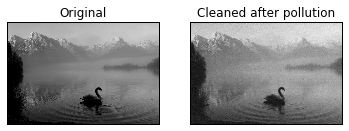

In [9]:
#clean the polluted swan_lake image
clean_swan = clean_image("./WaveletImages/swanlake_polluted.jpg")

#Plot the cleaned image versus the unpolluted, original image

#get the unpolluted image
original_swan = imread("./WaveletImages/swanlake_gray.jpg", True)

#plot them both
plt.subplot(121)
plt.title("Original")
plt.imshow(original_swan, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title("Cleaned after pollution")
plt.imshow(clean_swan, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.show()

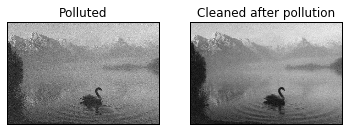

In [10]:
#Check how it looks compared to the polluted one
polluted_swan = imread("./WaveletImages/swanlake_polluted.jpg")

#plot them both
plt.subplot(121)
plt.title("Polluted")
plt.imshow(polluted_swan, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.subplot(122)
plt.title("Cleaned after pollution")
plt.imshow(clean_swan, cmap = "gray")
plt.xticks([])
plt.yticks([])

plt.show()